In [1]:
'Example based on https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py'

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 72s - loss: 0.3360 - acc: 0.8963 - val_loss: 0.0843 - val_acc: 0.9737
Epoch 2/12
60000/60000 [==============================] - 72s - loss: 0.1174 - acc: 0.9653 - val_loss: 0.0534 - val_acc: 0.9835
Epoch 3/12
60000/60000 [==============================] - 69s - loss: 0.0882 - acc: 0.9741 - val_loss: 0.0462 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 68s - loss: 0.0745 - acc: 0.9775 - val_loss: 0.0379 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 69s - loss: 0.0637 - acc: 0.9812 - val_loss: 0.0358 - val_acc: 0.9880
Epoch 6/12
60000/60000 [==============================] - 68s - loss: 0.0564 - acc: 0.9830 - val_loss: 0.0363 - val_acc: 0.9884
Epoch 7/12
60000/60000 [==============================] - 70s - loss: 0.0513 - acc: 0.9850 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 8/12
60000/60000 [==============================

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist_cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("mnist_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
from keras.models import model_from_json
# load json and create model
json_file = open('mnist_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_mnist_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_mnist_model.load_weights("mnist_cnn.h5")
print("Loaded model from disk")

Loaded model from disk


In [65]:
%matplotlib inline
from matplotlib import pyplot
from keras.preprocessing.image import img_to_array
import numpy as np

def predict_class(image, loaded_model):
    array = img_to_array(image)
    array = array/255
    inputarray = np.expand_dims(array, axis=0)
    prediction = loaded_model.predict_classes(inputarray)
    return prediction

def display_image(image):
    pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

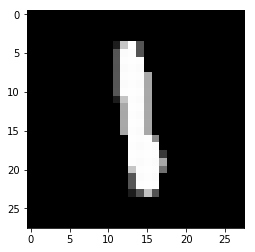

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image = X_train[200]
display_image(image)

In [68]:
predict_class(image, loaded_mnist_model)

1/1 [==============================] - 0s


array([1])